In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/flight-delay-prediction/Jan_2019_ontime.csv
/kaggle/input/flight-delay-prediction/Jan_2020_ontime.csv
/kaggle/input/flight-delays/fl_samp.csv
/kaggle/input/flight-delays/flight.csv
/kaggle/input/d/usdot/flight-delays/airports.csv
/kaggle/input/d/usdot/flight-delays/airlines.csv
/kaggle/input/d/usdot/flight-delays/flights.csv


In [2]:
import pandas as pd

df = pd.read_csv('../input/flight-delay-prediction/Jan_2019_ontime.csv')

In [3]:
df.head(10)

,DAY_OF_MONTH,DAY_OF_WEEK,OP_UNIQUE_CARRIER,OP_CARRIER_AIRLINE_ID,OP_CARRIER,TAIL_NUM,OP_CARRIER_FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN_AIRPORT_SEQ_ID,ORIGIN,...,DEST,DEP_TIME,DEP_DEL15,DEP_TIME_BLK,ARR_TIME,ARR_DEL15,CANCELLED,DIVERTED,DISTANCE,Unnamed: 21
0,1,2,9E,20363,9E,N8688C,3280,11953,1195302,GNV,...,ATL,601.0,0.0,0600-0659,722.0,0.0,0.0,0.0,300.0,NaN
1,1,2,9E,20363,9E,N348PQ,3281,13487,1348702,MSP,...,CVG,1359.0,0.0,1400-1459,1633.0,0.0,0.0,0.0,596.0,NaN
2,1,2,9E,20363,9E,N8896A,3282,11433,1143302,DTW,...,CVG,1215.0,0.0,1200-1259,1329.0,0.0,0.0,0.0,229.0,NaN
3,1,2,9E,20363,9E,N8886A,3283,15249,1524906,TLH,...,ATL,1521.0,0.0,1500-1559,1625.0,0.0,0.0,0.0,223.0,NaN
4,1,2,9E,20363,9E,N8974C,3284,10397,1039707,ATL,...,FSM,1847.0,0.0,1900-1959,1940.0,0.0,0.0,0.0,579.0,NaN
5,1,2,9E,20363,9E,N927EV,3285,11267,1126702,DAY,...,MSP,853.0,0.0,0900-0959,953.0,0.0,0.0,0.0,574.0,NaN
6,1,2,9E,20363,9E,N915XJ,3286,12448,1244807,JAN,...,ATL,1553.0,0.0,1500-1559,1832.0,0.0,0.0,0.0,341.0,NaN
7,1,2,9E,20363,9E,N295PQ,3287,12953,1295304,LGA,...,CVG,1551.0,0.0,1500-1559,1824.0,0.0,0.0,0.0,585.0,NaN
8,1,2,9E,20363,9E,N337PQ,3288,12451,1245102,JAX,...,LGA,1037.0,0.0,1000-1059,1239.0,0.0,0.0,0.0,833.0,NaN
9,1,2,9E,20363,9E,N311PQ,3289,10397,1039707,ATL,...,BMI,1245.0,0.0,1200-1259,1318.0,0.0,0.0,0.0,533.0,NaN


In [4]:
df.describe()

,DAY_OF_MONTH,DAY_OF_WEEK,OP_CARRIER_AIRLINE_ID,OP_CARRIER_FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN_AIRPORT_SEQ_ID,DEST_AIRPORT_ID,DEST_AIRPORT_SEQ_ID,DEP_TIME,DEP_DEL15,ARR_TIME,ARR_DEL15,CANCELLED,DIVERTED,DISTANCE,Unnamed: 21
count,583985.000000,583985.000000,583985.000000,583985.000000,583985.000000,5.839850e+05,583985.000000,5.839850e+05,567633.000000,567630.000000,566924.000000,565963.000000,583985.000000,583985.000000,583985.000000,0.0
mean,15.960088,3.835626,19983.213168,2537.869334,12659.701982,1.265974e+06,12659.470015,1.265951e+06,1331.957814,0.174281,1484.315921,0.185917,0.028641,0.002219,797.742767,NaN
std,8.987942,1.921899,377.724638,1821.736145,1519.405493,1.519403e+05,1519.336466,1.519334e+05,495.404020,0.379351,523.162855,0.389040,0.166796,0.047056,589.999261,NaN
min,1.000000,1.000000,19393.000000,1.000000,10135.000000,1.013505e+06,10135.000000,1.013505e+06,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,31.000000,NaN
25%,8.000000,2.000000,19790.000000,979.000000,11292.000000,1.129202e+06,11292.000000,1.129202e+06,921.000000,0.000000,1104.000000,0.000000,0.000000,0.000000,363.000000,NaN
50%,16.000000,4.000000,19977.000000,2114.000000,12889.000000,1.288903e+06,12889.000000,1.288903e+06,1328.000000,0.000000,1517.000000,0.000000,0.000000,0.000000,640.000000,NaN
75%,24.000000,5.000000,20368.000000,3902.000000,13931.000000,1.393102e+06,13931.000000,1.393102e+06,1738.000000,0.000000,1919.000000,0.000000,0.000000,0.000000,1037.000000,NaN
max,31.000000,7.000000,20452.000000,7439.000000,16218.000000,1.621802e+06,16218.000000,1.621802e+06,2400.000000,1.000000,2400.000000,1.000000,1.000000,1.000000,4983.000000,NaN


In [5]:
df = pd.read_csv('../input/flight-delay-prediction/Jan_2019_ontime.csv', index_col="DAY_OF_WEEK")

print("df")

df


In [6]:
df

,DAY_OF_MONTH,OP_UNIQUE_CARRIER,OP_CARRIER_AIRLINE_ID,OP_CARRIER,TAIL_NUM,OP_CARRIER_FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN_AIRPORT_SEQ_ID,ORIGIN,DEST_AIRPORT_ID,...,DEST,DEP_TIME,DEP_DEL15,DEP_TIME_BLK,ARR_TIME,ARR_DEL15,CANCELLED,DIVERTED,DISTANCE,Unnamed: 21
DAY_OF_WEEK,,,,,,,,,,,,,,,,,,,,,
2,1,9E,20363,9E,N8688C,3280,11953,1195302,GNV,10397,...,ATL,601.0,0.0,0600-0659,722.0,0.0,0.0,0.0,300.0,NaN
2,1,9E,20363,9E,N348PQ,3281,13487,1348702,MSP,11193,...,CVG,1359.0,0.0,1400-1459,1633.0,0.0,0.0,0.0,596.0,NaN
2,1,9E,20363,9E,N8896A,3282,11433,1143302,DTW,11193,...,CVG,1215.0,0.0,1200-1259,1329.0,0.0,0.0,0.0,229.0,NaN
2,1,9E,20363,9E,N8886A,3283,15249,1524906,TLH,10397,...,ATL,1521.0,0.0,1500-1559,1625.0,0.0,0.0,0.0,223.0,NaN
2,1,9E,20363,9E,N8974C,3284,10397,1039707,ATL,11778,...,FSM,1847.0,0.0,1900-1959,1940.0,0.0,0.0,0.0,579.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4,31,UA,19977,UA,N776UA,200,12016,1201602,GUM,12173,...,HNL,749.0,0.0,0700-0759,1832.0,0.0,0.0,0.0,3801.0,NaN
4,31,UA,19977,UA,N36280,174,12016,1201602,GUM,14955,...,SPN,717.0,0.0,0700-0759,759.0,0.0,0.0,0.0,129.0,NaN
4,31,UA,19977,UA,N36280,117,14955,1495503,SPN,12016,...,GUM,857.0,0.0,0900-0959,933.0,0.0,0.0,0.0,129.0,NaN


In [7]:
df.describe()

,DAY_OF_MONTH,OP_CARRIER_AIRLINE_ID,OP_CARRIER_FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN_AIRPORT_SEQ_ID,DEST_AIRPORT_ID,DEST_AIRPORT_SEQ_ID,DEP_TIME,DEP_DEL15,ARR_TIME,ARR_DEL15,CANCELLED,DIVERTED,DISTANCE,Unnamed: 21
count,583985.000000,583985.000000,583985.000000,583985.000000,5.839850e+05,583985.000000,5.839850e+05,567633.000000,567630.000000,566924.000000,565963.000000,583985.000000,583985.000000,583985.000000,0.0
mean,15.960088,19983.213168,2537.869334,12659.701982,1.265974e+06,12659.470015,1.265951e+06,1331.957814,0.174281,1484.315921,0.185917,0.028641,0.002219,797.742767,NaN
std,8.987942,377.724638,1821.736145,1519.405493,1.519403e+05,1519.336466,1.519334e+05,495.404020,0.379351,523.162855,0.389040,0.166796,0.047056,589.999261,NaN
min,1.000000,19393.000000,1.000000,10135.000000,1.013505e+06,10135.000000,1.013505e+06,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,31.000000,NaN
25%,8.000000,19790.000000,979.000000,11292.000000,1.129202e+06,11292.000000,1.129202e+06,921.000000,0.000000,1104.000000,0.000000,0.000000,0.000000,363.000000,NaN
50%,16.000000,19977.000000,2114.000000,12889.000000,1.288903e+06,12889.000000,1.288903e+06,1328.000000,0.000000,1517.000000,0.000000,0.000000,0.000000,640.000000,NaN
75%,24.000000,20368.000000,3902.000000,13931.000000,1.393102e+06,13931.000000,1.393102e+06,1738.000000,0.000000,1919.000000,0.000000,0.000000,0.000000,1037.000000,NaN
max,31.000000,20452.000000,7439.000000,16218.000000,1.621802e+06,16218.000000,1.621802e+06,2400.000000,1.000000,2400.000000,1.000000,1.000000,1.000000,4983.000000,NaN


Setup Complete


Text(0, 0.5, 'Arrival delay (in minutes)')

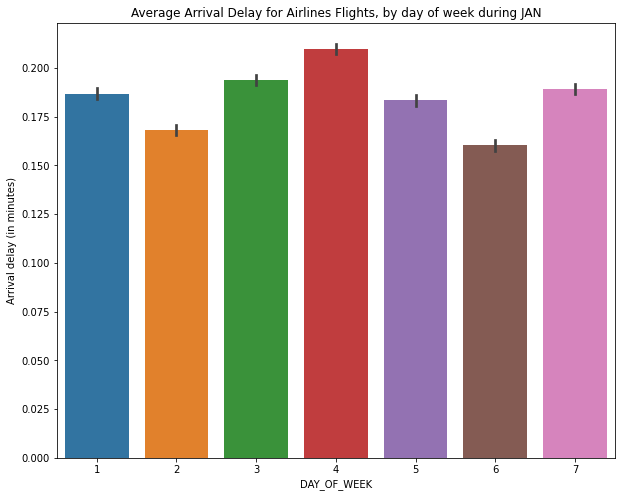

In [8]:
import pandas as pd
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
print("Setup Complete")

# Set the width and height of the figure
plt.figure(figsize=(10,8))

# Add title
plt.title("Average Arrival Delay for Airlines Flights, by day of week during JAN")

# Bar chart showing average arrival delay for Spirit Airlines flights by month
sns.barplot(x=df.index, y=df['ARR_DEL15'])

# Add label for vertical axis
plt.ylabel("Arrival delay (in minutes)")

Text(0, 0.5, 'Distance travelled')

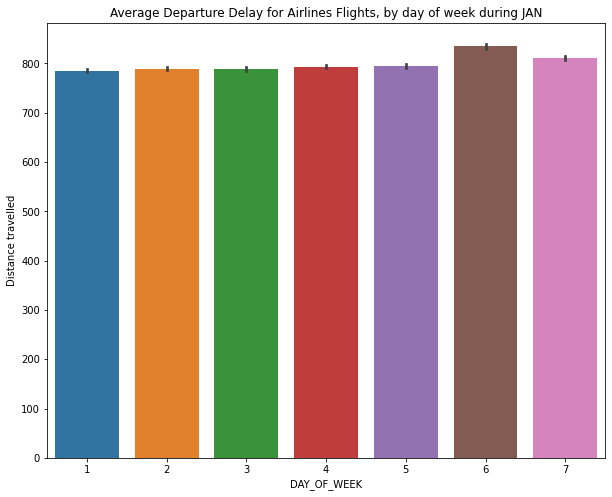

In [9]:
# Set the width and height of the figure
plt.figure(figsize=(10,8))

# Add title
plt.title("Average Departure Delay for Airlines Flights, by day of week during JAN")

# Bar chart showing average arrival delay for Spirit Airlines flights by month
sns.barplot(x=df.index, y=df['DISTANCE'])

# Add label for vertical axis
plt.ylabel("Distance travelled")

Text(0, 0.5, 'Departure delay (in minutes)')

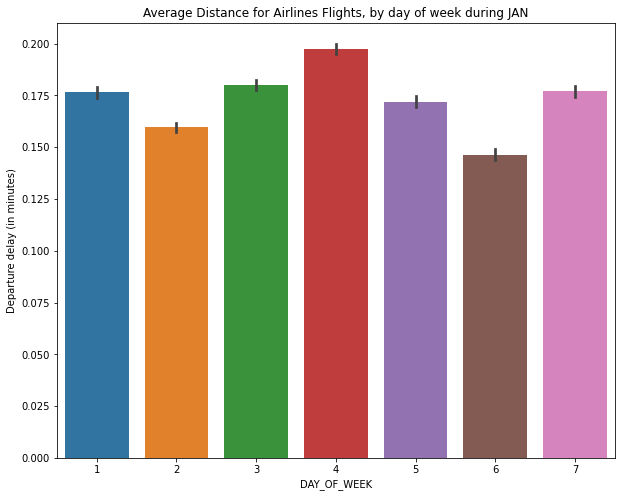

In [10]:
# Set the width and height of the figure
plt.figure(figsize=(10,8))

# Add title
plt.title("Average Distance for Airlines Flights, by day of week during JAN")

# Bar chart showing average arrival delay for Spirit Airlines flights by month
sns.barplot(x=df.index, y=df['DEP_DEL15'])

# Add label for vertical axis
plt.ylabel("Departure delay (in minutes)")